# Create ROC
This notebook creates the ROC curve (Figure 5).

Requires the CAD model output from `run_CAD_on_data.ipynb`, also available as `*_results.csv` files within each dataset directory.

Text(0.5, 0, 'False Positive Rate')

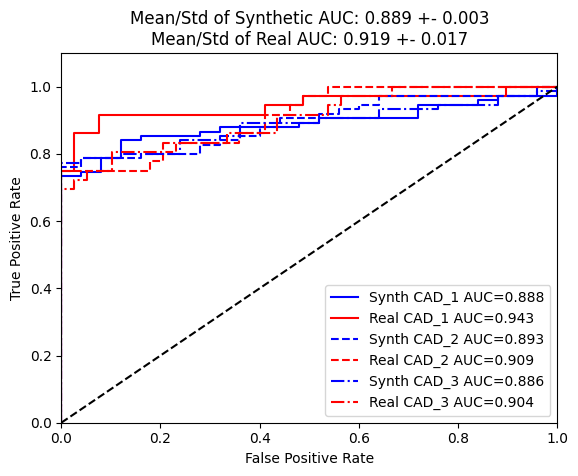

In [9]:
import pandas as pd
from pathlib import Path
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# read in Hssayeni results
df = pd.read_csv('../datasets/real_dataset_predictions.csv')



#dataset_path = Path('../datasets')
dataset_path = '/projects01/didsr-aiml/jayse.weaver/insilicoich/'
dataset_name = 'mA_280_standard_run1'
model_names = ['CAD_1', 'CAD_2', 'CAD_3']
colors = ['blue', 'blue', 'blue'] #, 'blue', 'green', 'c']
styles = ['-', '--', '-.'] #, '-.', '-.']

synth_auc = []
real_auc = []

for idx, model in enumerate(model_names):

    # read in synthetic results
    ds1 = pd.read_csv(dataset_path + dataset_name + '/' + dataset_name + '_' + model + '_results.csv')
    fpr, tpr, thresh = metrics.roc_curve(ds1['truth'], ds1['pred'], pos_label=1)
    synth_auc.append(metrics.auc(fpr, tpr))

    plt.plot(fpr, tpr, styles[idx], label = ('Synth ' + str(model) + ' AUC=%0.3f' % synth_auc[idx]), color='blue', markersize=0)

    # read in real results
    df_real = pd.read_csv('../datasets/' + model + '_real_preds.csv')
    results_real = df_real[["Any_ICH", "Model_Output"]].to_numpy()
    results_real = results_real[~np.isnan(results_real).any(axis=1), :] # remove rows with nan (no CT images)
    labels_real = results_real[:, 0]
    pred_real = results_real[:, 1]
    fpr_real, tpr_real, thresholds_real = metrics.roc_curve(labels_real, pred_real, pos_label=1)
    roc_df_real = pd.DataFrame(zip(fpr_real, tpr_real, thresholds_real),columns = ["FPR","TPR","Threshold"])
    real_auc.append(metrics.auc(fpr_real, tpr_real))

    plt.plot(fpr_real, tpr_real, styles[idx], label = ('Real ' + str(model) + ' AUC=%0.3f' % real_auc[idx]), color='red', markersize=0)

plt.title('Mean/Std of Synthetic AUC: %0.3f +- %0.3f\nMean/Std of Real AUC: %0.3f +- %0.3f' % (np.mean(synth_auc) , np.std(synth_auc) , np.mean(real_auc) , np.std(real_auc)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [ ]:
# ## Combine the three synthetic datasets into one ROC
# syn_string = 'Synthetic, AUC = %0.3f +- %0.3f' % (np.mean(auc) , np.std(auc))
# real_string = 'Real, AUC = %0.3f' % roc_auc

# ds1_roc = pd.DataFrame(zip(fpr_ds1, tpr_ds1, thresh_ds1),columns = ["FPR","TPR","Threshold"])
# ds1_roc['DS_ID'] = 'DS1'
# ds1_roc['Dataset Type'] = syn_string
# ds2_roc = pd.DataFrame(zip(fpr_ds2, tpr_ds2, thresh_ds2),columns = ["FPR","TPR","Threshold"])
# ds2_roc['DS_ID'] = 'DS2'
# ds2_roc['Dataset Type'] = syn_string
# ds3_roc = pd.DataFrame(zip(fpr_ds3, tpr_ds3, thresh_ds3),columns = ["FPR","TPR","Threshold"])
# ds3_roc['DS_ID'] = 'DS3'
# ds3_roc['DS_TYPE'] = syn_string

# roc_df_real['Dataset Type'] = real_string
# roc_df_real['DS_ID'] = 'Real1'

# all_roc = pd.concat([ds1_roc, ds2_roc, ds3_roc])

# import seaborn as sns
# plt.figure()
# plt.title('Receiver Operating Characteristic Curve for Real and 3 Synthetic Datasets')
# ax = sns.lineplot(data=all_roc, x='FPR', y='TPR', hue='Dataset Type')
# plt.plot(fpr_real, tpr_real, 'co-', label = 'Real AUC = %0.3f' % roc_auc, color='orange', markersize=0)
# ax.legend()
# sns.move_legend(ax, "lower right")
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])

NameError: name 'fpr_ds1' is not defined

Text(0.5, 0, 'False Positive Rate')

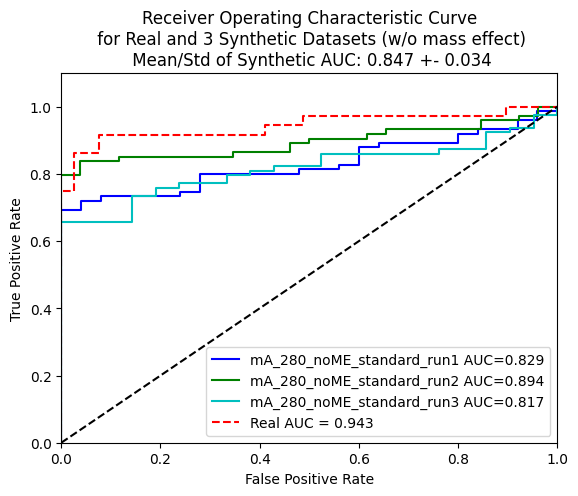

In [5]:
# NO MASS EFFECT

#dataset_path = Path('../datasets')
dataset_path = '/projects01/didsr-aiml/jayse.weaver/insilicoich/'
dataset_names = ['mA_280_noME_standard_run1', 'mA_280_noME_standard_run2', 'mA_280_noME_standard_run3']
#dataset_names = ['mA_280_run1', 'mA_280_run2', 'mA_280_run3', 'mA_280_standard_run1', 'mA_280_standard_run2', 'mA_280_standard_run3']
colors = ['blue', 'green', 'c'] #, 'blue', 'green', 'c']
styles = ['-', '-', '-', '-.'] #, '-.', '-.']

auc = []
for idx, dataset in enumerate(dataset_names):

    # read in synthetic results
    ds1 = pd.read_csv(dataset_path + dataset + '/' + dataset + '_results.csv')
    fpr, tpr, thresh = metrics.roc_curve(ds1['truth'], ds1['pred'], pos_label=1)
    auc.append(metrics.auc(fpr, tpr))

    plt.plot(fpr, tpr, styles[idx], label = (dataset + ' AUC=%0.3f' % auc[idx]), color=colors[idx], markersize=5)

plt.title('Receiver Operating Characteristic Curve\n for Real and 3 Synthetic Datasets (w/o mass effect)\n Mean/Std of Synthetic AUC: %0.3f +- %0.3f' % (np.mean(auc) , np.std(auc)))
plt.plot(fpr_real, tpr_real, '--', label = 'Real AUC = %0.3f' % roc_auc, color='red', markersize=5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')